In [1]:
using Flux
using Flux.Tracker, Statistics, DelimitedFiles
using Flux.Tracker: Params, gradient, update!
using Flux: gpu
using Flux: onehot, chunk, batchseq, throttle#, crossentropy
using Flux: @epochs

# This replicates the housing data example from the Knet.jl readme. Although we
# could have reused more of Flux (see the mnist example), the library's
# abstractions are very lightweight and don't force you into any particular
# strategy.
# https://github.com/FluxML/model-zoo/blob/master/other/housing/housing.jl
cd(@__DIR__)

isfile("housing.data") ||
  download("https://raw.githubusercontent.com/MikeInnes/notebooks/master/housing.data",
           "housing.data")

rawdata = readdlm("housing.data")'


using CSV, DataFrames
file = "BostonHousing.csv"

df = DataFrame(CSV.File(file)) #|> DataFrame!
#df[:medv]
#
lstat = df[:lstat]
medv = df[:medv]

print(names(df))
# The last feature is our target -- the price of the house.
split_ratio = 0.5 # For the train test split

x = rawdata[12:12,:] #|> gpu
y = rawdata[14:14,:] #|> gpu
Xs = x
Ys = y
# Normalise the data
x = (x .- mean(x, dims = 1)) ./ std(x, dims = 1)

# Split into train and test sets
split_index = floor(Int,size(x,2)*split_ratio)
x_train = x[:,1:split_index]
y_train = y[:,1:split_index]
x_test = x[:,split_index+1:size(x,2)]
y_test = y[:,split_index+1:size(x,2)]

# The model
W = param(randn(1,1)/10) #|> gpu
b = param([0.]) #|> gpu

predict(x) = W*x .+ b

meansquarederror(ŷ, y) = sum((ŷ .- y).^2)/size(y, 2)
loss(x, y) = meansquarederror(predict(x), y)

η = 0.1
θ = Params([W, b])

for i = 1:12
  g = gradient(() -> loss(x_train, y_train), θ)
  for x in θ
    update!(x, -g[x]*η)
  end
  @show loss(x_train, y_train)
end

# Predict the RMSE on the test set

# https://github.com/FluxML/model-zoo/blob/master/text/char-rnn/char-rnn.jl
m = Chain(
  LSTM(1, 505),
  LSTM(505, 505),
  Dense(505, 1),
  softmax)


#modelReg = Chain(Dense(1, 505))
#loss(x, y) = Flux.mse(modelReg(x), y)
#opt = SGD(Flux.params(modelReg), 0.1)
#@epochs 100 Flux.train!(loss, regData, opt)

#m = gpu(m)

#function loss(xs, ys)#
#  l = sum(crossentropy.(m.(gpu.(xs)), gpu.(ys)))
#  Flux.truncate!(m)
#  return l
#end
opt = SGD(params(m),0.1)
#
#opt = SGD()
#opt() # updates the weights

tx, ty = (Xs[5], Ys[5])
evalcb = () -> @show loss(tx, ty)
@epochs 25 Flux.train!(loss, zip(Xs, Ys), opt)


Symbol[:crim, :zn, :indus, :chas, :nox, :rm, :age, :dis, :rad, :tax, :ptratio, :b, :lstat, :medv]loss(x_train, y_train) = 435.5957424424429 (tracked)
loss(x_train, y_train) = 295.8662212980275 (tracked)
loss(x_train, y_train) = 209.1800640426801 (tracked)
loss(x_train, y_train) = 155.38444318380098 (tracked)
loss(x_train, y_train) = 121.98482920210292 (tracked)
loss(x_train, y_train) = 101.23459804245155 (tracked)
loss(x_train, y_train) = 88.3306934783752 (tracked)
loss(x_train, y_train) = 80.29500190415283 (tracked)
loss(x_train, y_train) = 75.28084318093491 (tracked)
loss(x_train, y_train) = 72.14301765637137 (tracked)
loss(x_train, y_train) = 70.17124833975831 (tracked)
loss(x_train, y_train) = 68.92492217760939 (tracked)


┌ Warning: SGD(params) is deprecated; use Descent(η::Float64) instead
│   caller = top-level scope at In[1]:77
└ @ Core In[1]:77
┌ Info: Epoch 1
└ @ Main /home/russell/.julia/packages/Flux/qXNjB/src/optimise/train.jl:105
┌ Warning: train!(loss, data, opt) is deprecated; use train!(loss, params, data, opt) instead
│   caller = top-level scope at train.jl:106
└ @ Core /home/russell/.julia/packages/Flux/qXNjB/src/optimise/train.jl:106
┌ Info: Epoch 2
└ @ Main /home/russell/.julia/packages/Flux/qXNjB/src/optimise/train.jl:105
┌ Info: Epoch 3
└ @ Main /home/russell/.julia/packages/Flux/qXNjB/src/optimise/train.jl:105
┌ Info: Epoch 4
└ @ Main /home/russell/.julia/packages/Flux/qXNjB/src/optimise/train.jl:105
┌ Info: Epoch 5
└ @ Main /home/russell/.julia/packages/Flux/qXNjB/src/optimise/train.jl:105
┌ Info: Epoch 6
└ @ Main /home/russell/.julia/packages/Flux/qXNjB/src/optimise/train.jl:105
┌ Info: Epoch 7
└ @ Main /home/russell/.julia/packages/Flux/qXNjB/src/optimise/train.jl:105
┌ Info: Epoc

88.42034284826853 (tracked)


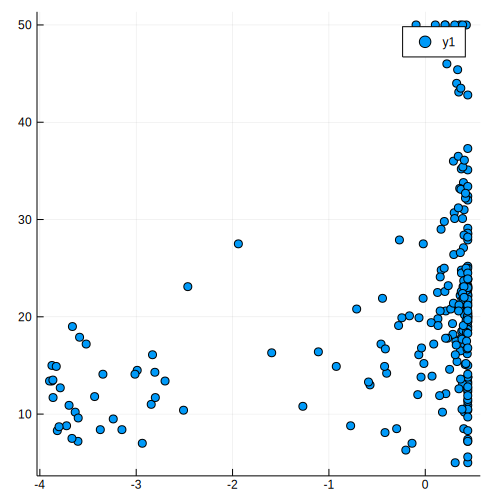

In [2]:
err = meansquarederror(predict(x_test),y_test)
println(err)
x_test
y_test

using StatsPlots
p2 = scatter(x_test',y_test')
plot(p2, layout=(1,1), size=(500,500))

In [3]:
#opt = ADAM(0.01)
#@epochs 15 Flux.train!(loss, params(m), zip(Xs, Ys), opt, cb = throttle(evalcb, 30))


In [4]:
loss

loss (generic function with 1 method)

In [5]:
Xs


1×505 Array{Float64,2}:
 396.9  392.83  394.63  396.9  394.12  …  391.99  396.9  396.9  393.45  396.9

In [6]:
opt

#24 (generic function with 1 method)

In [7]:
Ys 

1×505 Array{Float64,2}:
 21.6  34.7  33.4  36.2  28.7  22.9  …  16.8  22.4  20.6  23.9  22.0  11.9

In [8]:
z

UndefVarError: UndefVarError: z not defined

In [9]:
varinfo()

| name             |        size | summary                                                                                                                                                                                                                                                                                                           |
|:---------------- | -----------:|:----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| Base             |             | Module                                                                                                                                                                                                                                                                                                            |
| Core             |             | Module                                                                                                                                                                                                                                                                                                            |
| Main             |             | Module                                                                                                                                                                                                                                                                                                            |
| W                |   152 bytes | Tracked 1×1 Array{Float64,2}                                                                                                                                                                                                                                                                                      |
| Xs               |   3.984 KiB | 1×505 Array{Float64,2}                                                                                                                                                                                                                                                                                            |
| Ys               |   3.984 KiB | 1×505 Array{Float64,2}                                                                                                                                                                                                                                                                                            |
| b                |   152 bytes | Tracked 1-element Array{Float64,1}                                                                                                                                                                                                                                                                                |
| df               | 102.594 KiB | 506×14 DataFrame                                                                                                                                                                                                                                                                                                  |
| err              |  10.828 KiB | Tracker.TrackedReal{Float64}                                                                                                                                                                                                                                                                                      |
| evalcb           |     0 bytes | getfield(Main, Symbol("##5#6"))                                                                                                                                                                                                                                                                                   |
| file             |    25 bytes | String                                                                                                                                                                                                                                                                                                            |
| loss             |     0 bytes | typeof(loss)                                                                                                                                                                                                                                                                                                      |
| lstat            |   7.945 KiB | 506-element Array{Union{Missing, Float64},1}                                                                                                                                                                                                                                                                      |
| m                |  23.415 MiB | Chain{Tuple{Flux.Recur{Flux.LSTMCell{TrackedArray{…,Array{Float32,2}},TrackedArray{…,Array{Float32,1}}}},Flux.Recur{Flux.LSTMCell{TrackedArray{…,Array{Float32,2}},TrackedArray{…,Array{Float32,1}}}},Dense{typeof(identity),TrackedArray{…,Array{Float32,2}},TrackedArray{…,Array{Float32,1}}},typeof(softmax)}} |
| meansquarederror |     0 bytes | typeof(meansquarederror)                                                                                                                                                                                                                                                                                          |
| medv             |   7.945 KiB | 506-element Array{Union{Missing, Float64},1}                                                                                                                                                                                                                                                                      |
| opt              |  23.416 MiB | getfield(Flux.Optimise, Symbol("##24#25")){Descent,Params}                                                                                                                                                                                                                                                        |
| p2               |  33.354 KiB | Plots.Plot{Plots.GRBackend}                                                                                                                                                                                                                                                                                       |
| predict          |     0 bytes | typeof(predict)                                                                                                                                                                                                                                                                                                   |
| rawdata          |  55.281 KiB | 14×505 LinearAlgebra.Adjoint{Float64,Array{Float64,2}}                                                                                                                                                                                                                                                            |
| split_index      |     8 bytes | Int64                                                                                                                                                                                                                                                                                                             |
| split_ratio      |     8 bytes | Float64                                                                                                                                                                                                                                                                                                           |
| tx               |     8 bytes | Float64                                                                                                                                                                                                                                                                                                           |
| ty               |     8 bytes | Float64                                                                                                                                                                                                                                                                                                           |
| x                |   3.984 KiB | 1×505 Array{Float64,2}                                                                                                                                                                                                                                                                                            |
| x_test           |   2.016 KiB | 1×253 Array{Float64,2}                                                                                                                                                                                                                                                                                            |
| x_train          |   2.008 KiB | 1×252 Array{Float64,2}                                                                                                                                                                                                                                                                                            |
| y                |   3.984 KiB | 1×505 Array{Float64,2}                                                                                                                                                                                                                                                                                            |
| y_test           |   2.016 KiB | 1×253 Array{Float64,2}                                                                                                                                                                                                                                                                                            |
| y_train          |   2.008 KiB | 1×252 Array{Float64,2}                                                                                                                                                                                                                                                                                            |
| η                |     8 bytes | Float64                                                                                                                                                                                                                                                                                                           |
| θ                |   704 bytes | Params                                                                                                                                                                                                                                                                                                            |


In [10]:

predict(x) = W*x .+ b
plot_x = predict(Xs)

Tracked 1×505 Array{Float64,2}:
 1921.96  1902.47  1911.09  1921.96  …  1921.96  1921.96  1905.44  1921.96

In [11]:
#typeof(Xs)
plot_x = W*Xs.+b

typeof(plot_x)
varinfo(Tracker)


| name          |        size | summary          |
|:------------- | -----------:|:---------------- |
| Params        |   196 bytes | DataType         |
| TrackedArray  |   120 bytes | UnionAll         |
| TrackedMatrix |    80 bytes | UnionAll         |
| TrackedVector |    80 bytes | UnionAll         |
| Tracker       | 846.326 KiB | Module           |
| back!         |     0 bytes | typeof(back!)    |
| gradient      |     0 bytes | typeof(gradient) |
| hessian       |     0 bytes | typeof(hessian)  |
| jacobian      |     0 bytes | typeof(jacobian) |
| param         |     0 bytes | typeof(param)    |


In [12]:

p1 = scatter(Tracker.data(plot_x[1,:]),Ys[1,:], xlabel="Epoch", ylabel="Error")

#using 

MethodError: MethodError: no method matching Float64(::Tracker.TrackedReal{Float64})
Closest candidates are:
  Float64(::Real, !Matched::RoundingMode) where T<:AbstractFloat at rounding.jl:194
  Float64(::T<:Number) where T<:Number at boot.jl:741
  Float64(!Matched::Int8) at float.jl:60
  ...

In [13]:
p2 = scatter(predict(Xs)', Ys', reg=true, xlabel="Predicted", ylabel="Observed")
plot(p1,p2, layout=(1,2), size=(950,500))

MethodError: MethodError: no method matching Float64(::Tracker.TrackedReal{Float64})
Closest candidates are:
  Float64(::Real, !Matched::RoundingMode) where T<:AbstractFloat at rounding.jl:194
  Float64(::T<:Number) where T<:Number at boot.jl:741
  Float64(!Matched::Int8) at float.jl:60
  ...

In [14]:
list1 = [Tracker.data(i) for i in plot_x[1,:]]
list2 = [i for i in Ys[1,:]]
println(typeof(list1[1]))
println(typeof(list2[1]))
print(list1[1])

Tracker.TrackedReal{Float64}
Float64
1921.9588738295683 (tracked)

In [15]:
size(Ys)
Ys

1×505 Array{Float64,2}:
 21.6  34.7  33.4  36.2  28.7  22.9  …  16.8  22.4  20.6  23.9  22.0  11.9

In [16]:
xx = Tracker.data(list1)

Tracked 505-element Array{Float64,1}:
 1921.9588738295683
 1902.4735302734416
 1911.091126932171 
 1921.9588738295683
 1908.6494745455311
 1915.7350540204864
 1921.9588738295683
 1872.7906973378188
 1873.1737016337622
 1900.9893886266605
 1921.9588738295683
 1891.3185301540866
 1921.9588738295683
    ⋮              
 1921.9588738295683
 1904.6758049751172
 1921.9588738295683
 1921.9588738295683
 1921.9588738295683
 1916.5489381493662
 1921.9588738295683
 1898.4519851660348
 1921.9588738295683
 1921.9588738295683
 1905.441813567004 
 1921.9588738295683

  0.000724 seconds (630 allocations: 42.797 KiB)


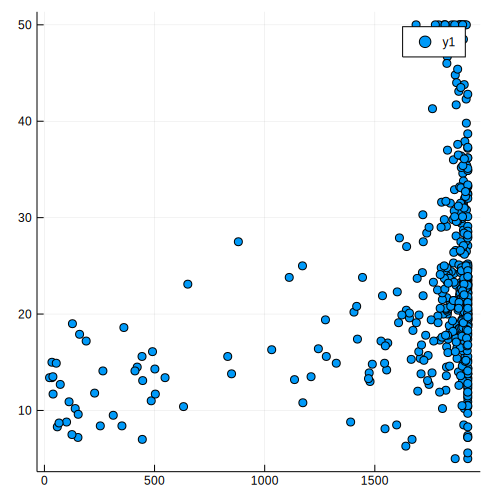

In [17]:
xx = Tracker.data(xx)

p2 = scatter(xx,list2)
@time plot(p2, layout=(1,1), size=(500,500))

In [18]:
varinfo()

| name             |        size | summary                                                                                                                                                                                                                                                                                                           |
|:---------------- | -----------:|:----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| Base             |             | Module                                                                                                                                                                                                                                                                                                            |
| Core             |             | Module                                                                                                                                                                                                                                                                                                            |
| Main             |             | Module                                                                                                                                                                                                                                                                                                            |
| W                |   152 bytes | Tracked 1×1 Array{Float64,2}                                                                                                                                                                                                                                                                                      |
| Xs               |   3.984 KiB | 1×505 Array{Float64,2}                                                                                                                                                                                                                                                                                            |
| Ys               |   3.984 KiB | 1×505 Array{Float64,2}                                                                                                                                                                                                                                                                                            |
| b                |   152 bytes | Tracked 1-element Array{Float64,1}                                                                                                                                                                                                                                                                                |
| df               | 102.594 KiB | 506×14 DataFrame                                                                                                                                                                                                                                                                                                  |
| err              |  10.828 KiB | Tracker.TrackedReal{Float64}                                                                                                                                                                                                                                                                                      |
| evalcb           |     0 bytes | getfield(Main, Symbol("##5#6"))                                                                                                                                                                                                                                                                                   |
| file             |    25 bytes | String                                                                                                                                                                                                                                                                                                            |
| list1            |  87.586 KiB | 505-element Array{Tracker.TrackedReal{Float64},1}                                                                                                                                                                                                                                                                 |
| list2            |   3.984 KiB | 505-element Array{Float64,1}                                                                                                                                                                                                                                                                                      |
| loss             |     0 bytes | typeof(loss)                                                                                                                                                                                                                                                                                                      |
| lstat            |   7.945 KiB | 506-element Array{Union{Missing, Float64},1}                                                                                                                                                                                                                                                                      |
| m                |  23.415 MiB | Chain{Tuple{Flux.Recur{Flux.LSTMCell{TrackedArray{…,Array{Float32,2}},TrackedArray{…,Array{Float32,1}}}},Flux.Recur{Flux.LSTMCell{TrackedArray{…,Array{Float32,2}},TrackedArray{…,Array{Float32,1}}}},Dense{typeof(identity),TrackedArray{…,Array{Float32,2}},TrackedArray{…,Array{Float32,1}}},typeof(softmax)}} |
| meansquarederror |     0 bytes | typeof(meansquarederror)                                                                                                                                                                                                                                                                                          |
| medv             |   7.945 KiB | 506-element Array{Union{Missing, Float64},1}                                                                                                                                                                                                                                                                      |
| opt              |  23.416 MiB | getfield(Flux.Optimise, Symbol("##24#25")){Descent,Params}                                                                                                                                                                                                                                                        |
| p2               |  37.292 KiB | Plots.Plot{Plots.GRBackend}                                                                                                                                                                                                                                                                                       |
| plot_x           |  12.453 KiB | Tracked 1×505 Array{Float64,2}                                                                                                                                                                                                                                                                                    |
| predict          |     0 bytes | typeof(predict)                                                                                                                                                                                                                                                                                                   |
| rawdata          |  55.281 KiB | 14×505 LinearAlgebra.Adjoint{Float64,Array{Float64,2}}                                                                                                                                                                                                                                                            |
| split_index      |     8 bytes | Int64                                                                                                                                                                                                                                                                                                             |
| split_ratio      |     8 bytes | Float64                                                                                                                                                                                                                                                                                                           |
| tx               |     8 bytes | Float64                                                                                                                                                                                                                                                                                                           |
| ty               |     8 bytes | Float64                                                                                                                                                                                                                                                                                                           |
| x                |   3.984 KiB | 1×505 Array{Float64,2}                                                                                                                                                                                                                                                                                            |
| x_test           |   2.016 KiB | 1×253 Array{Float64,2}                                                                                                                                                                                                                                                                                            |
| x_train          |   2.008 KiB | 1×252 Array{Float64,2}                                                                                                                                                                                                                                                                                            |
| xx               |   3.984 KiB | 505-element Array{Float64,1}                                                                                                                                                                                                                                                                                      |
| y                |   3.984 KiB | 1×505 Array{Float64,2}                                                                                                                                                                                                                                                                                            |
| y_test           |   2.016 KiB | 1×253 Array{Float64,2}                                                                                                                                                                                                                                                                                            |
| y_train          |   2.008 KiB | 1×252 Array{Float64,2}                                                                                                                                                                                                                                                                                            |
| η                |     8 bytes | Float64                                                                                                                                                                                                                                                                                                           |
| θ                |   704 bytes | Params                                                                                                                                                                                                                                                                                                            |
